<a href="https://colab.research.google.com/github/neerajthandayan/Misc./blob/main/ResearchExecutiveTask/ResearchExecutiveTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("https://github.com/neerajthandayan/Misc./blob/main/ResearchExecutiveTask/Research%20Executive%20Task%20(Oct%202021).xlsx?raw=true",header=6).drop(columns='Unnamed: 0')
df.head()

,Company Name,County,Region,BDS Application Date,BDS Decision Date,Tonnes,Product
0,Company 2,East Ayrshire,Scotland,2003-09-01,2017-02-01,1930000,Hardstone
1,Company 5,North Yorkshire,Yorkshire & Humberside,2010-09-01,2018-04-01,11300000,Sand&Gravel
2,Company 4,Lincolnshire,East Midlands,2010-12-01,2015-08-01,2250000,Sand&Gravel
3,Company 4,Hampshire,South East,2011-01-01,2015-05-01,2000000,Sand&Gravel
4,Company 5,Shropshire,West Midlands,2011-04-01,2017-03-01,0,Sand&Gravel


In [3]:
df.rename(columns={"Company Name":"Company",
                   "BDS Application Date":"AppDate",
                   "BDS Decision Date":"DecDate"}, inplace=True)

In [4]:
daynum = lambda x: x.days

df['DecTime'] = df['DecDate'] - df['AppDate']
df['DecTime'] = df['DecTime'].apply(daynum)

In [5]:
AppSucc = []
for i in df['Tonnes']:
  if i != 0:
    AppSucc.append(1)
  else:
    AppSucc.append(0)
df['AppSuccess'] = AppSucc

In [94]:
df.head()

,Company,County,Region,AppDate,DecDate,Tonnes,Product,DecTime,AppSuccess
0,Company 2,East Ayrshire,Scotland,2003-09-01,2017-02-01,1930000,Hardstone,4902,1
1,Company 5,North Yorkshire,Yorkshire & Humberside,2010-09-01,2018-04-01,11300000,Sand&Gravel,2769,1
2,Company 4,Lincolnshire,East Midlands,2010-12-01,2015-08-01,2250000,Sand&Gravel,1704,1
3,Company 4,Hampshire,South East,2011-01-01,2015-05-01,2000000,Sand&Gravel,1581,1
4,Company 5,Shropshire,West Midlands,2011-04-01,2017-03-01,0,Sand&Gravel,2161,0


## Application Rate by Company

In [6]:
company = []
apprate = []

for i in range(len(df['Company'].unique())):
  comp = df['Company'].unique()[i]
  app = df['AppDate'].loc[df['Company'] == comp]
  count = df['Company'].loc[df['Company'] == comp].count()
  if app.max() == app.min():
    rate = count
  else:
    rate = count/((app.max() - app.min()).days/365)
  company.append(comp)
  apprate.append(rate)

df1 = pd.DataFrame({'Company':company,'AppRate':apprate})
df1 = df1.sort_values(by='AppRate',ascending=False).reset_index(drop=True)
df1.head()

,Company,AppRate
0,Company 5,9.170348
1,Company 3,4.110103
2,Company 1,3.520386
3,Company 4,2.945245
4,Company 11,2.659381


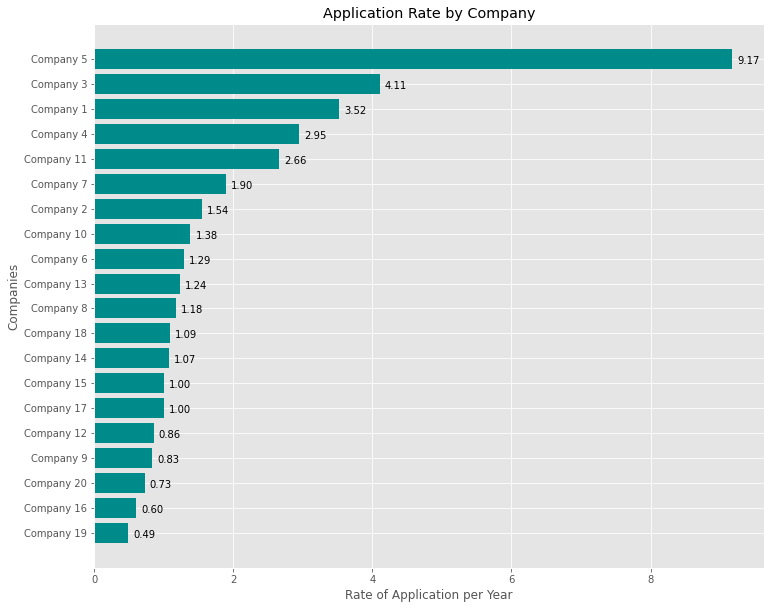

In [7]:
# Rate of application plot

plt.style.use('ggplot')
plt.figure(figsize=[12,10])
plt.barh(list(df1['Company']),list(df1['AppRate']),color='darkcyan')
plt.gca().invert_yaxis()
plt.title('Application Rate by Company')
plt.xlabel('Rate of Application per Year')
plt.ylabel('Companies')
for x,y in zip(list(df1['AppRate']),np.arange(len(list(df1['Company'])))):
    label = "{:.2f}".format(x)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(5,-5), ha='left')

# Company Success Rate by Region

In [8]:
succrate = []
region = []
cp = []

for i in range(len(df['Company'].unique())):
  comp = df['Company'].unique()[i]
  for j in range(len(df['Region'].unique())):
    area = df['Region'].unique()[j]
    cp.append(comp)
    region.append(area)
    try:
      succrate.append(df['AppSuccess'].loc[df['Region'] == area].loc[df['Company'] == comp].sum()/df['Company'].loc[df['Region'] == area].loc[df['Company'] == comp].count())
    except:
      succrate.append(np.nan)
  
df2 = pd.DataFrame({'Company':cp,'Region':region,'SuccessRate':succrate}).groupby(['Company','Region']).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


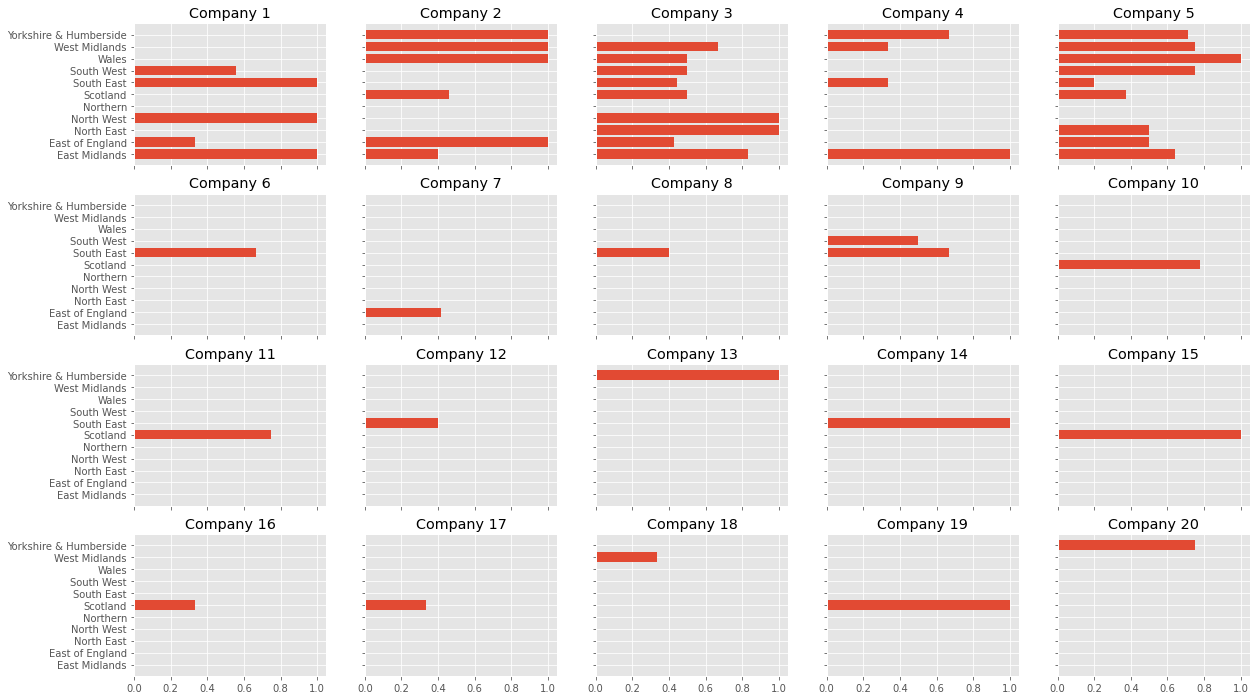

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=[20,12 ], sharey=True, sharex = True)

p = 0
for row in ax:
  for col in row:
    p = p + 1
    col.barh(list(df2['Region'].loc[df2['Company'] == f'Company {p}']),list(df2['SuccessRate'].loc[df2['Company'] == f'Company {p}']))
    col.set_title(f'Company {p}')

plt.show()

# Countywise average Decision Time

In [90]:
df3 = df[['County','DecTime']]
df3 = df3.groupby('County').mean().reset_index().sort_values('DecTime').reset_index(drop=True)

In [91]:
df3.head()

,County,DecTime
0,North Lanarkshire,1.0
1,West Sussex,1.0
2,East Dunbartonshire,60.5
3,Wiltshire,61.0
4,West Lothian,61.0


In [92]:
df3.tail()

,County,DecTime
55,Merthyr Tydfil,852.000000
56,Derbyshire,852.600000
57,North Yorkshire,904.818182
58,Surrey,1420.000000
59,East Ayrshire,1989.333333


In [11]:
# Decsion time to Success Rate Correlation
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dt_sc = sc.fit_transform(df['DecTime'].values.reshape(-1,1))

mod = sm.Logit(df['AppSuccess'].values,dt_sc.reshape(1,-1)[0])
print(mod.fit().summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.668267
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  279
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            0
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                 0.03027
Time:                        05:53:14   Log-Likelihood:                -186.45
converged:                       True   LL-Null:                       -192.27
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5603      0.171      3.286      0.001       0.226       0.895


# Countywise/Regionwise Product Demand

In [71]:
# Product and County
df4 = df[['County','Product']]
df4 = df4.value_counts().to_frame().reset_index().sort_values(['County',0],ascending=False)
df4 = df4.drop(index=df4.loc[df4['Product'] == 0].index)
df4 = df4.rename(columns={0:'Count'})
df4

,County,Product,Count
62,Wiltshire,Sand&Gravel,1
90,West Sussex,Sand&Gravel,1
65,West Midlands,Sand&Gravel,1
66,West Midlands,Asphalt,1
68,Warwickshire,Sand&Gravel,1
...,...,...,...
37,Aberdeenshire,Hardstone,2
50,Aberdeenshire,Limestone,1
51,Aberdeenshire,Sand&Gravel,1
46,Aberdeen City,Sand&Gravel,1


Text(0.5, 1.0, 'County-Product Heatmap')

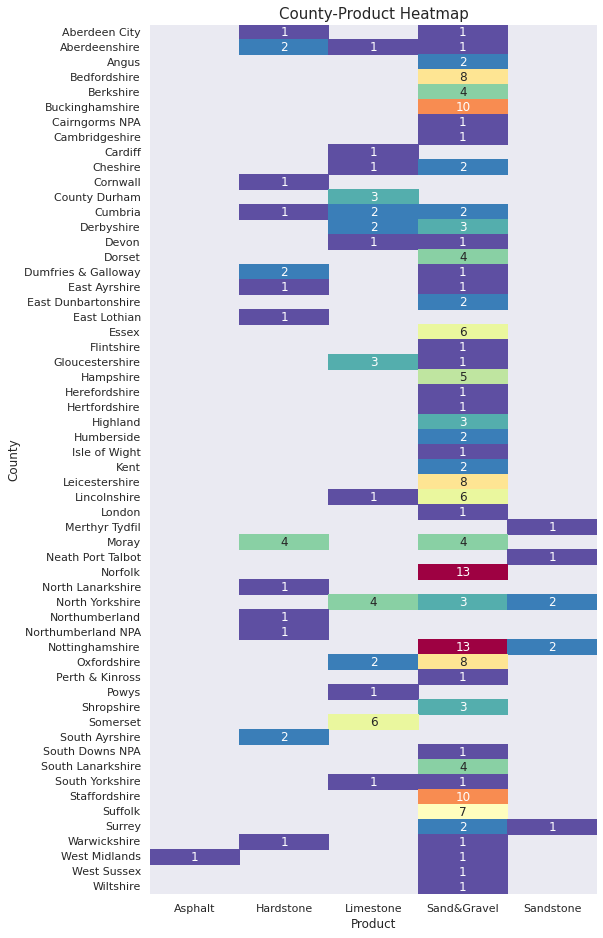

In [89]:
fig, ax = plt.subplots(figsize=(8,16))
sns.heatmap(df4.pivot('County','Product','Count'),annot=True, ax=ax, cmap='Spectral_r',cbar=False)
ax.set_title("County-Product Heatmap", fontdict={'fontsize':15})

In [47]:
df5 = df[['Region','Product']]
df5 = df5.value_counts().to_frame().reset_index().sort_values(['Region',0],ascending=False)
df5 = df5.drop(index=df5.loc[df5['Product'] == 0].index)
df5 = df5.rename(columns={0:'Count'})
df5

,Region,Product,Count
8,Yorkshire & Humberside,Sand&Gravel,8
10,Yorkshire & Humberside,Limestone,6
15,Yorkshire & Humberside,Sandstone,3
4,West Midlands,Sand&Gravel,23
30,West Midlands,Asphalt,1
34,West Midlands,Hardstone,1
17,Wales,Sandstone,2
23,Wales,Limestone,2
25,Wales,Sand&Gravel,1
7,South West,Limestone,11


Text(0.5, 1.0, 'Region-Product Heatmap')

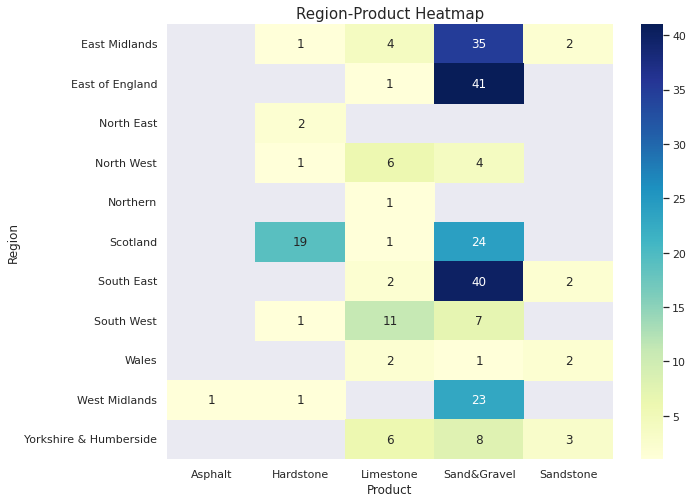

In [69]:
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df5.pivot('Region','Product','Count'),annot=True, ax=ax, cmap='YlGnBu')
ax.set_title("Region-Product Heatmap", fontdict={'fontsize':15})